In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('visit_data.csv')
df = pd.DataFrame(data)


# print(data.dtypes)
# print(data.head(10))
data = data.drop_duplicates() #drops all the duplicates


Patient           object
Visit_Reason      object
Date              object
Visit_Duration     int64
dtype: object
            Patient     Visit_Reason        Date  Visit_Duration
0       David Moore            Cough  2022-01-05              17
1       Ivy Johnson           Injury  2022-10-20              51
2     Hannah Miller         Headache  2022-08-24              25
3        Ivy Wilson          Allergy  2022-08-25              26
4  Charlie Williams  Routine Checkup  2022-10-27              25
5     Charlie Davis           Injury  2022-05-20              39
6        Ivy Miller         Headache  2022-02-20              16
7         Ivy Smith           Injury  2022-11-07              57
8        Jack Moore            Cough  2022-07-14              22
9         Bob Davis            Fever  2022-01-20              30


In [3]:
#make a list with the visit reasons and count the occurences of said reasons
visit_reason_list = data.Visit_Reason.value_counts()
index = visit_reason_list.index
values = visit_reason_list.values
calculated_list = []
print(index)
print(values)

Index(['Headache', 'Allergy', 'Routine Checkup', 'Injury', 'Cough', 'Fever'], dtype='object')
[1723 1679 1673 1664 1635 1610]


In [5]:
for sickness, visits in visit_reason_list.items():
    formatted_string = f"{visits} visits were due to {sickness}. "
    mask = data.Visit_Reason == sickness 
    mean_sickness = data.loc[mask, 'Visit_Duration'].mean().round(decimals=1)
    max_sickness = data.loc[mask, 'Visit_Duration'].max()
    min_sickness = data.loc[mask, 'Visit_Duration'].min()
    # formatted_string += f"A mean of {mean_sickness} minutes were spent per visit."
    # formatted_strings.append(formatted_string)
    row_sickness= ','.join([str(sickness),str(visits),str(mean_sickness),str(max_sickness),str(min_sickness)])
    calculated_list.append(row_sickness)
    print(row_sickness)

Headache,1723,15.3,25,5
Allergy,1679,20.0,30,10
Routine Checkup,1673,22.6,30,15
Injury,1664,44.8,60,30
Cough,1635,19.8,30,10
Fever,1610,30.2,45,15


In [6]:
print(calculated_list)
with open('calculations.csv', 'w') as file: #saves the list of the calculated values to a csv file
    file.write("Visit_Reason,Visits,Mean_Duration,Max_Duration,Min_Duration\n")
    file.write("\n".join(calculated_list))

['Headache,1723,15.3,25,5', 'Allergy,1679,20.0,30,10', 'Routine Checkup,1673,22.6,30,15', 'Injury,1664,44.8,60,30', 'Cough,1635,19.8,30,10', 'Fever,1610,30.2,45,15']


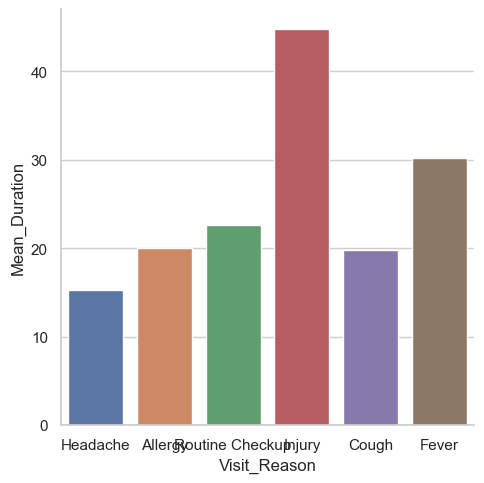

In [8]:
calculated_data = pd.read_csv('calculations.csv')
calculated_data = pd.DataFrame(calculated_data)

sns.set(style="whitegrid")  # Set the overall style
sns.catplot(data=calculated_data, kind="bar", x="Visit_Reason", y="Mean_Duration")
plt.show() #shows the graph of the mean duration of the visits per sickness

In [9]:
calculated_data = pd.read_csv('calculations.csv')
calculated_data = pd.DataFrame(calculated_data)
print(calculated_data.head())
print(calculated_data.dtypes)

sns.set(style="whitegrid")

# Melt the DataFrame to create a long-form data structure for boxplot
melted_data = data.melt(id_vars='Visit_Reason', value_vars=['Min_Duration', 'Max_Duration', 'Mean_Duration'], var_name='Duration Type', value_name='Duration')

# Create a grouped boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_data, x='Visit_Reason', y='Duration', hue='Duration Type', palette='Set2')
plt.title('Grouped Boxplot of Min, Max, and Mean Durations by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration [min]')
plt.xticks(rotation=45)
plt.legend(title='Duration Type')
plt.tight_layout()
plt.show()





      Visit_Reason  Visits  Mean_Duration  Max_Duration  Min_Duration
0         Headache    1723           15.3            25             5
1          Allergy    1679           20.0            30            10
2  Routine Checkup    1673           22.6            30            15
3           Injury    1664           44.8            60            30
4            Cough    1635           19.8            30            10
Visit_Reason      object
Visits             int64
Mean_Duration    float64
Max_Duration       int64
Min_Duration       int64
dtype: object


KeyError: "The following 'value_vars' are not present in the DataFrame: ['Max_Duration', 'Mean_Duration', 'Min_Duration']"

In [10]:
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Visit_Reason", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=calculated_data)
sns.despine(offset=10, trim=True)

ValueError: Could not interpret input 'total_bill'

      Visit_Reason  Visits  Mean_Duration  Max_Duration  Min_Duration
0         Headache    1723           15.3            25             5
1          Allergy    1679           20.0            30            10
2  Routine Checkup    1673           22.6            30            15
3           Injury    1664           44.8            60            30
4            Cough    1635           19.8            30            10
Visit_Reason      object
Visits             int64
Mean_Duration    float64
Max_Duration       int64
Min_Duration       int64
dtype: object


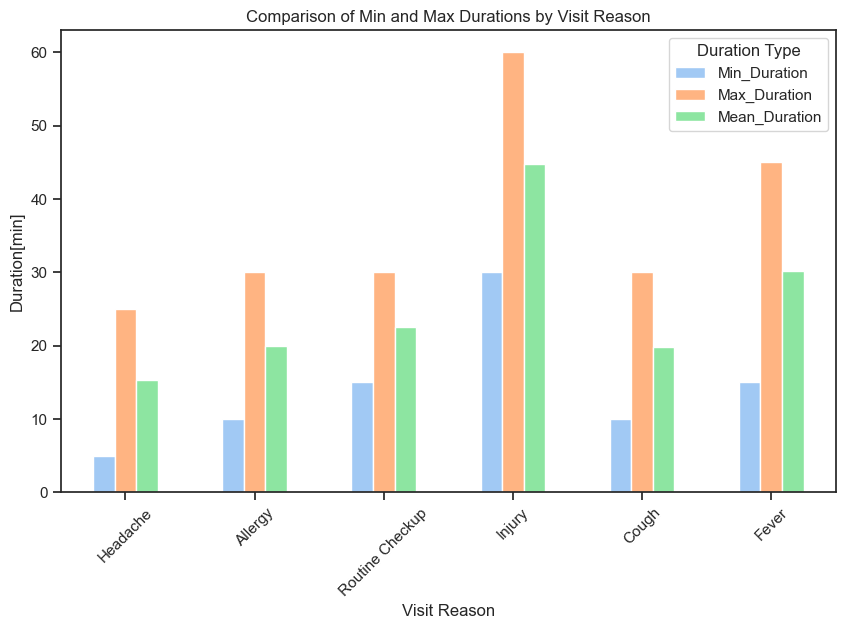

In [16]:
calculated_data = pd.read_csv('calculations.csv')
calculated_data = pd.DataFrame(calculated_data)
print(calculated_data.head())
print(calculated_data.dtypes)


calculated_data.set_index('Visit_Reason', inplace=True)

# Create a bar plot for Min_Duration and Max_Duration
fig, ax = plt.subplots(figsize=(10, 6))

calculated_data[['Min_Duration', 'Max_Duration',"Mean_Duration"]].plot(kind='bar', ax=ax)
plt.title('Comparison of Min and Max Durations by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration[min]')
plt.xticks(rotation=45) 
plt.legend(title='Duration Type')
plt.show()
